In [1]:
import networkx as nx
import numpy as np
import warnings
import datetime as dt
from scipy import stats
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('axes', axisbelow=True)

In [2]:
import pandas as pd
import matplotlib
from matplotlib import gridspec

In [6]:
cases = pd.read_csv('../data/1581551273.37747wuhan_cases.csv')
cases = cases.rename(columns={cases.columns[0]: "date"})
provinces = cases.columns[1:]  # ADDED
melted_cases = pd.melt(cases, id_vars='date',
                       value_vars=provinces, var_name='province',
                       value_name='cases')

In [7]:
full_data = melted_cases.copy()  # ADDED

In [8]:
total_dates = np.unique(list(full_data.date))

In [9]:
total_cases_prov = {pr:sum(np.nan_to_num(list(full_data.loc[full_data.province==pr,].cases))) for pr in provinces}

In [10]:
final_cases_prov = dict(zip(list(full_data.loc[full_data.date==total_dates[-1],].province),
                            list(full_data.loc[full_data.date==total_dates[-1],].cases)))

In [11]:
sort_final_cases = {k: v for k, v in sorted(final_cases_prov.items(), key=lambda item: item[1])}

In [12]:
top_8 = {'Chongqing': 311.0,
         'Anhui': 415.0,
         'Jiangxi': 465.0,
         'Henan': 583.0,
         'Hunan': 589.0,
         'Zhejiang': 706.0,
         'Guangdong': 844.0,
         'Hubei':6998.0}

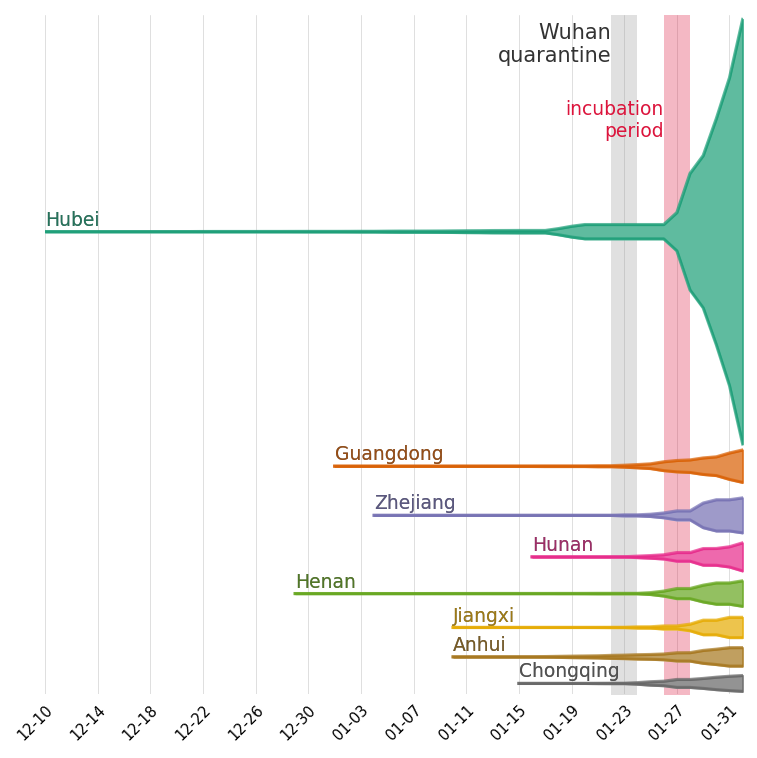

In [13]:
cols = dict(zip(list(top_8.keys()),plt.cm.Dark2(np.linspace(1,0,8))))
csum = 0
pad = 200
fig, ax = plt.subplots(1,1,dpi=150, figsize=(6,6))
num_success = 0
totals = 0
for i,pr in enumerate(list(top_8.keys())):
    tot_cases_i = sum(np.nan_to_num(list(full_data.loc[full_data.province==pr,].cases)))
    totals = totals + tot_cases_i
    max_cases_i = top_8[pr]
    xvals = total_dates[:-3]
    slice_dat = full_data.loc[full_data.province==pr,]
    slice_dat = slice_dat.loc[slice_dat.date<='2020-02-01',]
    stdvs = np.array(list(slice_dat.cases))
    yvals = np.array([csum+pad+np.nan_to_num(max_cases_i)]*len(xvals))#[:-3]

    ax.plot(xvals, yvals-stdvs, alpha=0.7, color=cols[pr],zorder=20)
    ax.plot(xvals, yvals+stdvs, alpha=0.7, color=cols[pr],zorder=20)
    ax.fill_between(xvals, yvals-stdvs, yvals+stdvs, alpha=1.0, color='w',zorder=20)
    ax.fill_between(xvals, yvals-stdvs, yvals+stdvs, alpha=0.7, color=cols[pr],zorder=20)
    ax.text(min(xvals[~np.isnan(stdvs)]), yvals[0]+pad, pr,
            color='#333333', fontsize=9)
    ax.text(min(xvals[~np.isnan(stdvs)]), yvals[0]+pad, pr,
            color=cols[pr],alpha=0.6, fontsize=9)
    maxx = np.nan_to_num(yvals+stdvs)
    csum = max(maxx)
    num_success += 1


#ax.fill_between(xvals[43:46], 0, csum+150, alpha=1, color='w',zorder=1)
ax.fill_between(xvals[43:46], 0, csum+150, alpha=0.3, color='#999999',zorder=1, linewidth=0)
ax.fill_between(xvals[47:50], 0, csum+150, alpha=0.3, color='crimson',zorder=1, linewidth=0)
ax.set_xticks(total_dates[:-3][::4])
ax.set_ylim(150, csum+150)
ax.text(xvals[43], max(yvals+stdvs/1.25), 'Wuhan\nquarantine', horizontalalignment='right',
        color='#333333', fontsize=10)
ax.text(xvals[47], max(yvals+stdvs/2.25), 'incubation\nperiod', horizontalalignment='right',
        color='crimson', fontsize=9)
ax.set_xlim(total_dates[:-3][0], total_dates[:-3][-1])
ax.set_xticklabels([i[-5:] for i in list(total_dates[:-3][::4])], rotation=45, fontsize=7,y=0.01, rotation_mode ="anchor", horizontalalignment="right")
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(linewidth=0.3, color='#999999', alpha=0.5)
ax.tick_params(axis='x', which='both', bottom=False,labelbottom=True)

plt.savefig('nCovCases1.png',dpi=425,bbox_inches='tight')
plt.savefig('nCovCases1.pdf',bbox_inches='tight')
plt.show()

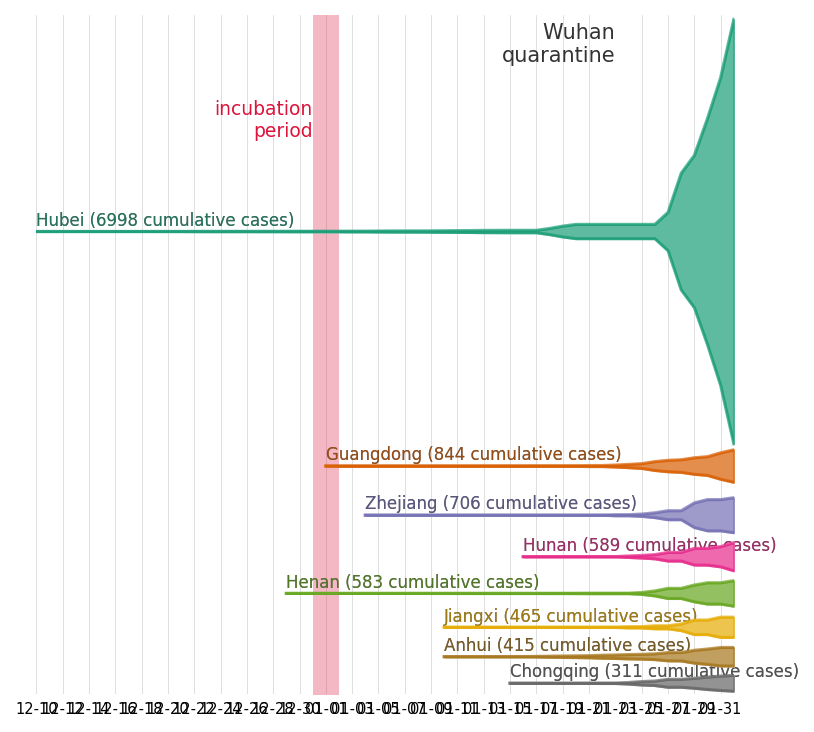

In [20]:
cols = dict(zip(list(top_8.keys()),plt.cm.Dark2(np.linspace(1,0,8))))
csum = 0
pad = 200
fig, ax = plt.subplots(1,1,dpi=150, figsize=(6,6))
num_success = 0

for i,pr in enumerate(list(top_8.keys())):
    tot_cases_i = sum(np.nan_to_num(list(full_data.loc[full_data.province==pr,].cases)))
    max_cases_i = top_8[pr]
    xvals = total_dates[:-3]
    slice_dat = full_data.loc[full_data.province==pr,]
    slice_dat = slice_dat.loc[slice_dat.date<='2020-02-01',]
    stdvs = np.array(list(slice_dat.cases))
    yvals = np.array([csum+pad+np.nan_to_num(max_cases_i)]*len(xvals))#[:-3]

    ax.plot(xvals, yvals-stdvs, alpha=0.7, color=cols[pr],zorder=20)
    ax.plot(xvals, yvals+stdvs, alpha=0.7, color=cols[pr],zorder=20)
    ax.fill_between(xvals, yvals-stdvs, yvals+stdvs, alpha=1.0, color='w',zorder=20)
    ax.fill_between(xvals, yvals-stdvs, yvals+stdvs, alpha=0.7, color=cols[pr],zorder=20)
    ax.text(min(xvals[~np.isnan(stdvs)]), yvals[0]+pad, pr+' (%i cumulative cases)'%max_cases_i,
            color='#333333', fontsize=8)
    ax.text(min(xvals[~np.isnan(stdvs)]), yvals[0]+pad, pr+' (%i cumulative cases)'%max_cases_i,
            color=cols[pr],alpha=0.6, fontsize=8)
    maxx = np.nan_to_num(yvals+stdvs)
    csum = max(maxx)
    num_success += 1


ax.fill_between(xvals[44:45], 0, csum+150, alpha=1, color='w',zorder=1)
ax.fill_between(xvals[44:45], 0, csum+150, alpha=0.3, color='#999999',zorder=1, linewidth=0)
ax.fill_between(xvals[48:50], 0, csum+150, alpha=0.3, color='crimson',zorder=1, linewidth=0)
ax.set_xticks(total_dates[:-3][::2])
ax.set_ylim(150, csum+150)
ax.text(xvals[44], max(yvals+stdvs/1.25), 'Wuhan\nquarantine', horizontalalignment='right',
        color='#333333', fontsize=10)
ax.text(xvals[48], max(yvals+stdvs/2.25), 'incubation\nperiod', horizontalalignment='right',
        color='crimson', fontsize=9)
ax.set_xlim(total_dates[:-3][0], total_dates[:-3][-1])
ax.set_xticklabels([i[-5:] for i in list(total_dates[:-3][::2])], rotation=0, fontsize=7,y=0.01)
ax.set_yticks([])
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(linewidth=0.3, color='#999999', alpha=0.5)
ax.tick_params(axis='x', which='both', bottom=False,labelbottom=True)

plt.savefig('nCovCases2.png',dpi=425,bbox_inches='tight')
plt.savefig('nCovCases2.pdf',bbox_inches='tight')
plt.show()